In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
breast_cancer = pd.read_csv('data/breast-cancer.csv', header=None)
breast_cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [3]:
total_cols = ['id', 'outcome', 'time', 'cell_1_radius', 'cell_1_texture', 'cell_1_perimiter',
              'cell_1_area', 'cell_1_smoothness', 'cell_1_compactness', 'cell_1_concavity',
              'cell_1_concave_points', 'cell_1_symmetry', 'cell_1_fractal_dimension',
              'cell_2_radius', 'cell_2_texture', 'cell_2_perimiter', 'cell_2_area',
              'cell_2_smoothness', 'cell_2_compactness', 'cell_2_concavity',
              'cell_2_concave_points', 'cell_2_symmetry', 'cell_2_fractal_dimension', 'cell_3_radius', 
              'cell_3_texture', 'cell_3_perimiter', 'cell_3_area', 'cell_3_smoothness',
              'cell_3_compactness', 'cell_3_concavity', 'cell_3_concave_points', 'cell_3_symmetry',
              'cell_3_fractal_dimension', 'tumor_size', 'lymph_status']
breast_cancer.columns = total_cols

In [4]:
breast_cancer.head(5)

,id,outcome,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,...,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size,lymph_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [5]:
# Define DF with only numerical features
numerics = breast_cancer._get_numeric_data()

In [6]:
numerics.head(5)

,id,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,cell_1_concave_points,...,cell_3_texture,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size
0,119513,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0
1,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0
2,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5
3,843483,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0
4,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5


In [7]:
# Clean nuermical features w/o explanatory value
numerics = numerics.drop(['id','time'], axis=1)

Before we apply PCA we need to standardize/scale the data. For this we can use sklearn's preprocessing library 


In [8]:
# Check for missing values in numerics DF
numerics.isna().sum()

cell_1_radius               0
cell_1_texture              0
cell_1_perimiter            0
cell_1_area                 0
cell_1_smoothness           0
cell_1_compactness          0
cell_1_concavity            0
cell_1_concave_points       0
cell_1_symmetry             0
cell_1_fractal_dimension    0
cell_2_radius               0
cell_2_texture              0
cell_2_perimiter            0
cell_2_area                 0
cell_2_smoothness           0
cell_2_compactness          0
cell_2_concavity            0
cell_2_concave_points       0
cell_2_symmetry             0
cell_2_fractal_dimension    0
cell_3_radius               0
cell_3_texture              0
cell_3_perimiter            0
cell_3_area                 0
cell_3_smoothness           0
cell_3_compactness          0
cell_3_concavity            0
cell_3_concave_points       0
cell_3_symmetry             0
cell_3_fractal_dimension    0
tumor_size                  0
dtype: int64

In [10]:
#Scaling the data before PCA with Z-Scaler - ???WHAT DOES RANDOM_STATE=42 MEAN???

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = numerics

X_train, X_test = train_test_split(X, test_size=0.30, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test , columns = X.columns)

In [11]:
X_train.shape
X_train.head()

,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,cell_1_concave_points,cell_1_symmetry,cell_1_fractal_dimension,...,cell_3_texture,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size
0,-1.029360,-0.597899,-1.032479,-1.007636,-0.396464,-0.579869,-0.876548,-0.875281,-0.189789,0.207246,...,0.126188,-1.159052,-1.095070,-0.070412,-0.392649,-0.686216,-0.573434,-0.734806,0.184541,-1.246175
1,-0.764121,1.839970,-0.596960,-0.784631,0.167274,1.333018,1.382919,0.209745,0.748697,1.277375,...,2.095932,-0.450623,-0.926620,-0.137513,2.853531,4.571611,1.313984,1.244322,2.667466,-0.124966
2,-1.443794,-0.847303,-1.447492,-1.331053,1.019078,-0.397882,-0.473793,-0.421625,0.748697,0.750737,...,-0.354277,-1.406264,-1.222454,1.631094,0.363974,0.433838,0.674505,0.971488,1.461908,-0.925830
3,-1.341014,-0.361976,-1.329335,-1.257317,-0.080523,-0.349352,-0.702376,-0.996175,-0.789064,0.247973,...,-0.672937,-1.240226,-1.258578,0.787531,0.403133,0.448673,1.080145,-0.606329,0.895820,-0.124966
4,-0.157389,-0.752934,-0.108710,-0.250798,0.887435,0.291647,0.485414,0.654334,0.760004,0.115962,...,-0.859509,-0.273516,-0.405676,1.233277,0.209995,0.441256,1.760188,-0.170372,0.031487,-0.658875


In [12]:
# Perform PCA with single value decomposition solver on training and testing set

from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')

pca.fit(X_train)

X_train = pca.transform(X_train)
X_test  = pca.transform(X_test)

cols = [ 'PCA_' + str(i) for i in list(range(1,len(X.columns)+1))]

X_train = pd.DataFrame(X_train, columns = cols)
X_test  = pd.DataFrame(X_test , columns = cols)

X_train.head()
X_test.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30,PCA_31
0,-2.205357,-0.798907,0.962459,-1.593581,-0.065381,-0.735983,-0.583305,-0.413740,0.130200,0.462303,...,0.066526,0.011081,-0.164783,-0.109174,0.023737,0.012974,0.039734,-0.007064,0.008727,-0.013575
1,4.629399,-3.004352,-0.392459,0.167698,0.721083,0.262713,-1.512247,-1.170410,-0.295812,0.161189,...,-0.090452,0.113923,-0.096908,0.078595,-0.111975,0.030792,0.045818,-0.019133,0.024080,-0.027897
2,1.755951,4.249683,-1.112490,-2.466038,2.332257,-0.353759,0.311229,1.020329,0.622923,-1.155342,...,0.150885,-0.170227,0.251864,0.004927,0.083742,-0.004918,-0.090507,0.049987,0.006312,-0.000020
3,-0.948900,-0.385563,-0.870882,-0.903846,-0.295521,0.421403,0.145001,0.195224,0.075830,0.205581,...,0.150228,-0.105989,0.059348,-0.177738,0.108750,-0.040452,-0.038593,-0.012872,-0.022844,-0.006758
4,-5.162636,-1.588721,-1.082485,-0.779308,3.233571,-1.206475,0.558331,0.466280,-0.038636,0.802206,...,-0.007413,0.183555,-0.004207,0.016842,-0.003861,-0.044797,0.005021,0.056137,0.004278,0.022311


In [13]:
# Getting variances of each component
print(pca.explained_variance_ratio_) # Individual variances of each principal components
#print(pca.singular_values_)

[3.31661305e-01 2.49324986e-01 1.09352369e-01 6.82674577e-02
 4.67130312e-02 4.12540649e-02 3.00949735e-02 2.71658870e-02
 2.09436303e-02 1.74950457e-02 1.17772229e-02 1.07936917e-02
 8.56683449e-03 6.01042064e-03 4.01689715e-03 3.39383954e-03
 2.52921856e-03 2.31828169e-03 1.69630180e-03 1.40084577e-03
 1.17052327e-03 9.39276299e-04 8.04918584e-04 7.32410741e-04
 5.67358896e-04 4.12878638e-04 3.59688265e-04 1.29941284e-04
 6.95397705e-05 2.69394660e-05 1.02204779e-05]


In [14]:
# Let's put the variances in a list and show the top 6
variances = pca.explained_variance_ratio_.tolist()
variances[:6]

[0.33166130542432803,
 0.2493249855853666,
 0.10935236854791062,
 0.06826745774678944,
 0.046713031182365666,
 0.04125406493060156]

In [15]:
# Building the 3 column table for the scree chart and the cumulated bar chart

# Defining the series for the cumulated variance

total_variance = [sum(variances[:i]) for i in range(1, len(variances)+1)]

scree = pd.DataFrame({'num_pca': range(1,len(variances)+1),'variance': variances,'cum_variance': total_variance})
scree.head(31)

,num_pca,variance,cum_variance
0,1,0.331661,0.331661
1,2,0.249325,0.580986
2,3,0.109352,0.690339
3,4,0.068267,0.758606
4,5,0.046713,0.805319
5,6,0.041254,0.846573
6,7,0.030095,0.876668
7,8,0.027166,0.903834
8,9,0.020944,0.924778
9,10,0.017495,0.942273


<AxesSubplot:xlabel='num_pca', ylabel='cum_variance'>

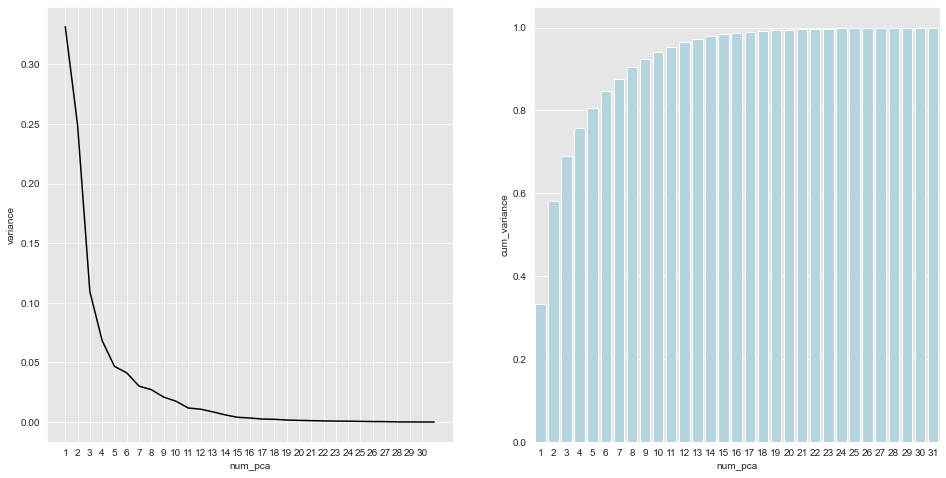

In [16]:
# Plotting of the PCA data variance table 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(1,2,figsize=(16,8))

sns.lineplot(x="num_pca", y="variance", data=scree, ax = ax[0], color = 'black')
ax[0].set_xticks(range(1,31))
sns.barplot(x="num_pca", y="cum_variance", data=scree, ax = ax[1], color = 'lightblue') 

With the top 5 PCA components a cumulated variance[5] of 0.805 can be explained. That is 80.5% of the total variability of the data.

In [17]:
# Getting the pca coefficients/ components to tie them back to the original features for explanation

pca.components_

array([[ 2.00324717e-01, -8.81192470e-03,  2.17559428e-01,
         2.03567616e-01,  1.37613634e-01,  2.48579188e-01,
         2.78137376e-01,  2.80033067e-01,  1.61121200e-01,
         1.06757075e-01,  2.34021362e-01,  8.91854310e-02,
         2.43234718e-01,  2.41098001e-01,  1.02067187e-01,
         1.91163326e-01,  2.12350711e-01,  1.87416648e-01,
         1.53998611e-01,  1.66027281e-01,  1.96974401e-01,
        -5.23857229e-02,  2.20414660e-01,  1.92739685e-01,
         3.47461028e-02,  1.30890190e-01,  1.82184339e-01,
         2.29568646e-01,  6.57816817e-02,  5.18731533e-02,
         1.26275247e-02],
       [-2.54892088e-01, -3.88411606e-02, -2.36443689e-01,
        -2.52262662e-01,  2.18288179e-01,  1.72661964e-01,
         6.83825557e-02, -2.18378212e-02,  1.87847862e-01,
         2.97852445e-01, -1.19648955e-01,  2.86932857e-02,
        -1.02362071e-01, -1.57153980e-01,  8.29087365e-02,
         1.80664069e-01,  1.17104058e-01,  3.44416877e-02,
         1.28801536e-01,  1.98

In [20]:
# First 5 pca components showing the weight of each feature within the components
pca.components_[0:5,:]

array([[ 0.20032472, -0.00881192,  0.21755943,  0.20356762,  0.13761363,
         0.24857919,  0.27813738,  0.28003307,  0.1611212 ,  0.10675707,
         0.23402136,  0.08918543,  0.24323472,  0.241098  ,  0.10206719,
         0.19116333,  0.21235071,  0.18741665,  0.15399861,  0.16602728,
         0.1969744 , -0.05238572,  0.22041466,  0.19273968,  0.0347461 ,
         0.13089019,  0.18218434,  0.22956865,  0.06578168,  0.05187315,
         0.01262752],
       [-0.25489209, -0.03884116, -0.23644369, -0.25226266,  0.21828818,
         0.17266196,  0.06838256, -0.02183782,  0.18784786,  0.29785244,
        -0.11964896,  0.02869329, -0.10236207, -0.15715398,  0.08290874,
         0.18066407,  0.11710406,  0.03444169,  0.12880154,  0.19851901,
        -0.24750269,  0.01274991, -0.22071089, -0.24420214,  0.22820503,
         0.22609533,  0.16886866,  0.0685156 ,  0.21211485,  0.29188941,
        -0.10132343],
       [-0.06913022,  0.1319518 , -0.07086021, -0.07549319, -0.02023934,
       

In [21]:
# Display of all PCA components with mapping of features.
# 5-7 components should be taken into consideration for the K-means to find out to which 'outcome' which feature mix
# would lead.

for comp in range(1,len(pca.components_)+1):
    print("Principal component ",comp)
    my_list = [(abs(value),index+1,X.columns[index],value) for index,value in enumerate(pca.components_[comp-1,:]) ]
    my_list.sort(reverse=True)
    my_list = [(elem[1],elem[2],round(elem[3],2)) for elem in my_list]
    print(my_list)
    print()

Principal component  1
[(8, 'cell_1_concave_points', 0.28), (7, 'cell_1_concavity', 0.28), (6, 'cell_1_compactness', 0.25), (13, 'cell_2_perimiter', 0.24), (14, 'cell_2_area', 0.24), (11, 'cell_2_radius', 0.23), (28, 'cell_3_concave_points', 0.23), (23, 'cell_3_perimiter', 0.22), (3, 'cell_1_perimiter', 0.22), (17, 'cell_2_concavity', 0.21), (4, 'cell_1_area', 0.2), (1, 'cell_1_radius', 0.2), (21, 'cell_3_radius', 0.2), (24, 'cell_3_area', 0.19), (16, 'cell_2_compactness', 0.19), (18, 'cell_2_concave_points', 0.19), (27, 'cell_3_concavity', 0.18), (20, 'cell_2_fractal_dimension', 0.17), (9, 'cell_1_symmetry', 0.16), (19, 'cell_2_symmetry', 0.15), (5, 'cell_1_smoothness', 0.14), (26, 'cell_3_compactness', 0.13), (10, 'cell_1_fractal_dimension', 0.11), (15, 'cell_2_smoothness', 0.1), (12, 'cell_2_texture', 0.09), (29, 'cell_3_symmetry', 0.07), (22, 'cell_3_texture', -0.05), (30, 'cell_3_fractal_dimension', 0.05), (25, 'cell_3_smoothness', 0.03), (31, 'tumor_size', 0.01), (2, 'cell_1_text

Generating a regression model with the PCA will not be performed as the target variable Generating a regression model with the pca is a non-numerical feature 
